### Necessary Packages

In [137]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,recall_score,precision_score
import warnings
warnings.filterwarnings('ignore')

### Data Preparation

In [20]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

In [21]:
X_train = tf.convert_to_tensor(np.float32(X_train))
y_train = tf.convert_to_tensor(y_train)
X_test = tf.convert_to_tensor(np.float32(X_test))
y_test = tf.convert_to_tensor(y_test)

In [22]:
print(f"X_train.shape = {X_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"X_test.shape = {X_test.shape}")
print(f"y_test.shape = {y_test.shape}")

X_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
X_test.shape = (10000, 32, 32, 3)
y_test.shape = (10000, 1)


In [23]:
print(f"X_train.shape = {X_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"X_test.shape = {X_test.shape}")
print(f"y_test.shape = {y_test.shape}")

X_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
X_test.shape = (10000, 32, 32, 3)
y_test.shape = (10000, 1)


### Data Normalization

In [24]:
X_train, X_test = X_train / 255.0, X_test / 255.0

### Define the architecture

In [25]:
def create_model_0() -> tf.keras.Model:

    model = tf.keras.Sequential(layers=[

        tf.keras.layers.Input(shape=(32,32,3)),

        tf.keras.layers.Conv2D(filters=16,kernel_size=3,padding='valid',activation=tf.keras.activations.relu),
        tf.keras.layers.Conv2D(filters=16,kernel_size=3,padding='valid',activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='valid',activation=tf.keras.activations.relu),
        tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='valid',activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(units=10,activation=tf.keras.activations.softmax)
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

    return model

In [26]:
model_0 = create_model_0()

In [27]:
model_0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                 

### Training

In [28]:
history_0 = model_0.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    batch_size=64,
    epochs=5,
)

Epoch 1/5
782/782 [==============================] - 9s 6ms/step - loss: 1.6002 - sparse_categorical_accuracy: 0.4186 - val_loss: 1.3577 - val_sparse_categorical_accuracy: 0.5134
Epoch 2/5
782/782 [==============================] - 4s 6ms/step - loss: 1.2772 - sparse_categorical_accuracy: 0.5446 - val_loss: 1.2539 - val_sparse_categorical_accuracy: 0.5482
Epoch 3/5
782/782 [==============================] - 4s 5ms/step - loss: 1.1285 - sparse_categorical_accuracy: 0.6021 - val_loss: 1.1537 - val_sparse_categorical_accuracy: 0.5898
Epoch 4/5
782/782 [==============================] - 4s 5ms/step - loss: 1.0356 - sparse_categorical_accuracy: 0.6378 - val_loss: 0.9994 - val_sparse_categorical_accuracy: 0.6523
Epoch 5/5
782/782 [==============================] - 5s 6ms/step - loss: 0.9638 - sparse_categorical_accuracy: 0.6643 - val_loss: 1.0150 - val_sparse_categorical_accuracy: 0.6474


### Trying another architecture

In [143]:
def create_model_1() -> tf.keras.Model:

    model = tf.keras.Sequential(layers=[

        tf.keras.layers.Conv2D(filters=64,kernel_size=(2,2),padding='valid',activation=tf.keras.activations.relu, input_shape=(32,32,3)),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(2,2),padding='valid',activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),padding='valid',activation=tf.keras.activations.relu),
        tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),padding='valid',activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(units=158,activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(units=10,activation=tf.keras.activations.softmax)
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

    return model

In [144]:
model_1 = create_model_1()

In [145]:
model_1.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 31, 31, 64)        832       
                                                                 
 conv2d_55 (Conv2D)          (None, 30, 30, 64)        16448     
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_56 (Conv2D)          (None, 14, 14, 128)       32896     
                                                                 
 conv2d_57 (Conv2D)          (None, 13, 13, 128)       65664     
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                               

In [146]:
history_1 = model_1.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    batch_size=64,
    epochs=5
)

Epoch 1/5
782/782 [==============================] - 9s 9ms/step - loss: 1.4005 - sparse_categorical_accuracy: 0.4943 - val_loss: 1.1100 - val_sparse_categorical_accuracy: 0.6104
Epoch 2/5
782/782 [==============================] - 7s 9ms/step - loss: 0.9767 - sparse_categorical_accuracy: 0.6567 - val_loss: 0.9505 - val_sparse_categorical_accuracy: 0.6663
Epoch 3/5
782/782 [==============================] - 7s 9ms/step - loss: 0.8021 - sparse_categorical_accuracy: 0.7213 - val_loss: 0.8635 - val_sparse_categorical_accuracy: 0.7033
Epoch 4/5
782/782 [==============================] - 7s 9ms/step - loss: 0.6763 - sparse_categorical_accuracy: 0.7642 - val_loss: 0.7705 - val_sparse_categorical_accuracy: 0.7341
Epoch 5/5
782/782 [==============================] - 7s 9ms/step - loss: 0.5679 - sparse_categorical_accuracy: 0.8013 - val_loss: 0.7664 - val_sparse_categorical_accuracy: 0.7390


### Evaluation

In [147]:
def plot_learning_curve(history : tf.keras.callbacks.History):

  fig, (ax1, ax2) = plt.subplots(nrows=2)

  fig.set_size_inches(8,8)

  sns.lineplot(x=range(5), y=history.history["loss"], ax=ax1, label="Training Loss")
  sns.lineplot(x=range(5), y=history.history["val_loss"], ax=ax1, label="Validation Loss")

  sns.lineplot(x=range(5), y=history.history["sparse_categorical_accuracy"], ax=ax2, label="Training Accuracy")
  sns.lineplot(x=range(5), y=history.history["val_sparse_categorical_accuracy"], ax=ax2, label="Validation Accuracy")

In [148]:
def make_metric(metric,**kwargs):

    def _metric(y, y_hat):
        kwargs["y_true"] = y
        kwargs["y_pred"] = y_hat
        return metric(**kwargs)

    return _metric

In [149]:
metrics= {
    "accuracy" : accuracy_score,
    "precision_macro" : make_metric(precision_score, average="macro"),
    "precision_micro" : make_metric(precision_score, average="micro"),
    "recall_macro" : make_metric(recall_score, average="macro"),
    "recall_micro" : make_metric(recall_score, average="micro"),
    "f1_macro" : make_metric(f1_score, average="macro"),
    "f1_micro" : make_metric(f1_score, average="micro")
}

In [151]:
def compute_metrics(
    metrics : dict,
    y : np.ndarray,
    y_hat : np.ndarray
) -> pd.Series:

    results = {}

    for name, metric in metrics.items():
        results[name] = metric(y, y_hat)

    return pd.Series(results)

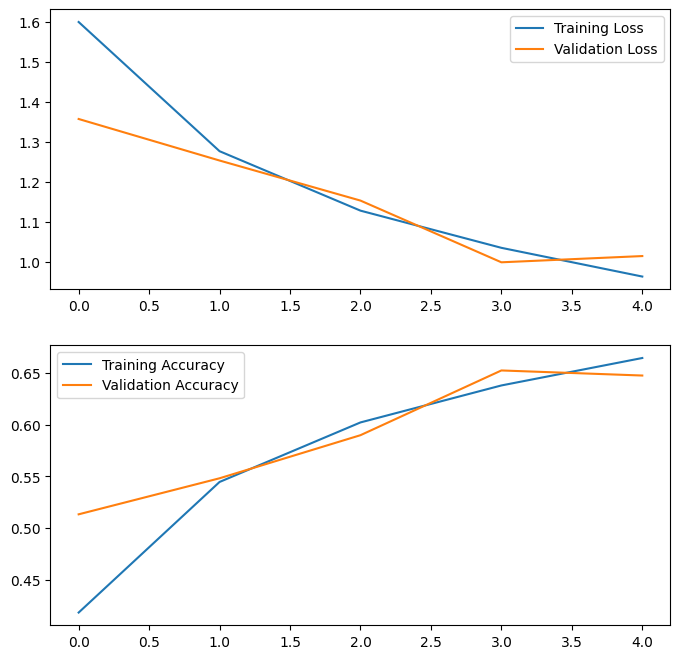

In [152]:
plot_learning_curve(history_0)

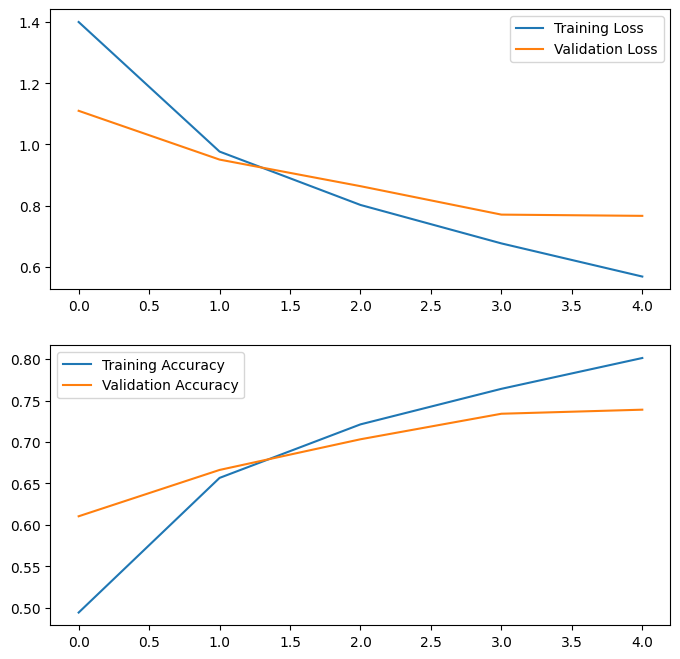

In [153]:
plot_learning_curve(history_1)

In [154]:
y_hat_0 = model_0.predict(X_test)
y_hat_0 = tf.argmax(y_hat_0, axis=1)

313/313 [==============================] - 1s 2ms/step


In [155]:
compute_metrics(metrics, y_test,y_hat_0)

accuracy           0.647400
precision_macro    0.670439
precision_micro    0.647400
recall_macro       0.647400
recall_micro       0.647400
f1_macro           0.649628
f1_micro           0.647400
dtype: float64

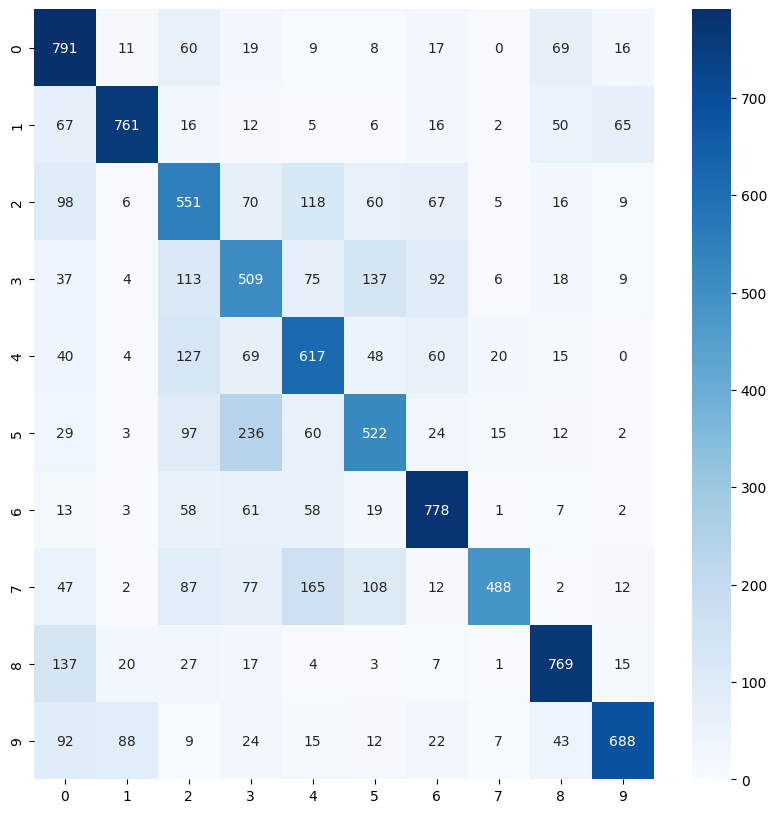

In [156]:
sns.heatmap(data=confusion_matrix(y_test,y_hat_0), annot=True, fmt=',d',cmap='Blues').get_figure().set_size_inches(10,10)

In [157]:
y_hat_1 = model_1.predict(X_test)
y_hat_1 = tf.argmax(y_hat_1, axis=1)

313/313 [==============================] - 1s 3ms/step


In [158]:
compute_metrics(metrics, y_test,y_hat_1)

accuracy           0.739000
precision_macro    0.744473
precision_micro    0.739000
recall_macro       0.739000
recall_micro       0.739000
f1_macro           0.738997
f1_micro           0.739000
dtype: float64

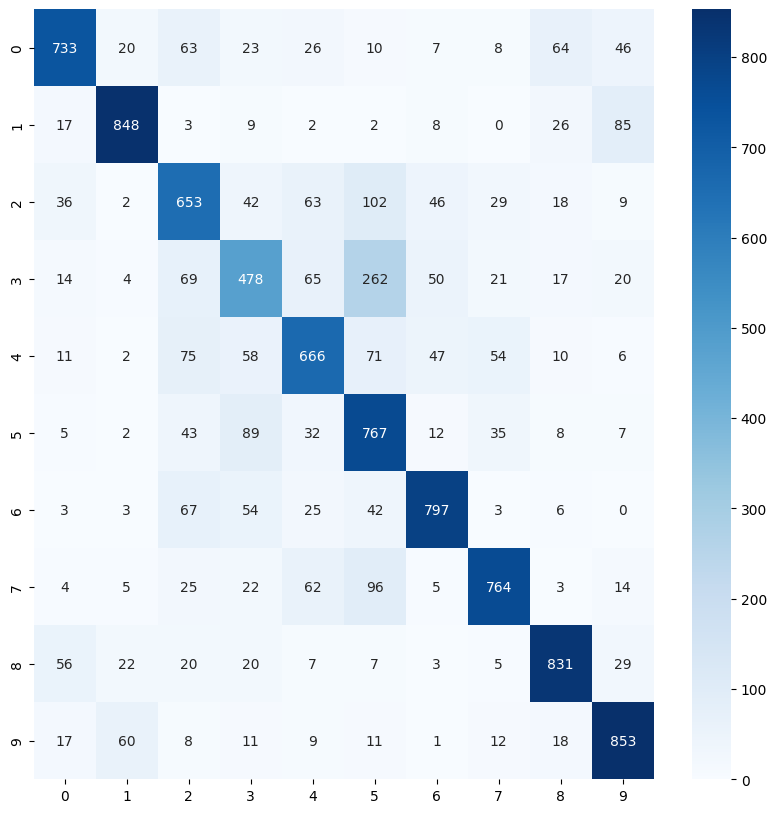

In [159]:
sns.heatmap(data=confusion_matrix(y_test,y_hat_1), annot=True, fmt=',d',cmap='Blues').get_figure().set_size_inches(10,10)